In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import time
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hours_marks_data.csv to hours_marks_data.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hours_marks_data.csv']))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df['Hours'], df['Marks'], test_size=0.2, random_state=42)
x_train = np.reshape(np.array(x_train), (-1,1))
x_test = np.reshape(np.array(x_test), (-1,1))
y_train = np.reshape(np.array(y_train), (-1,1))
y_test = np.reshape(np.array(y_test), (-1,1))


Train - Predictors shape (80, 1)
Test - Predictors shape (20, 1)
Train - Target shape (80, 1)
Test - Target shape (20, 1)


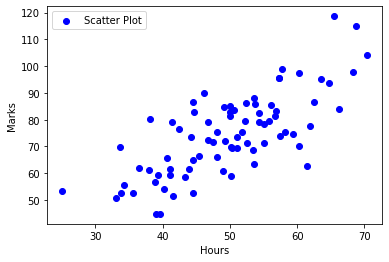

In [7]:
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


plt.scatter(x_train, y_train, c='b', label='Scatter Plot')

plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [0]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def model_optimize(w,b,X,Y):
    #
    m = X.shape[0]
    #
    final_result = np.dot(w, X.T) + b
    cost = (1/m)*np.sum((Y.T - final_result) ** 2)
    #
    dw = (-2/m)*np.sum((np.dot(X.T,(Y.T - final_result).T)))
    db = (-2/m)*np.sum(((Y.T - final_result)))
    #
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def predict(x,w,b):
    final_pred = np.dot(w, x.T) + b
    return final_pred

In [0]:
def gradientUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        
        grads, cost = model_optimize(w,b, X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        costs.append(cost)
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [0]:
def miniBatchUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []

    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        X, y = shuffle(x_train, y_train)
        x_random = X[:40]
        y_random = y[:40]
        
        grads, cost = model_optimize(w,b, x_random,y_random)
        #
        dw = grads["dw"]
        db = grads["db"]
        #Weight Update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        #
        costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [0]:
def stochasticUpdate(w,b,X, Y, learning_rate, no_iterations):
    costs = []

    n_points = X.shape[0]
    #
    for i in range(no_iterations):
        for i in range(n_points):
            index = np.random.randint(n_points)
            x_pt = X[index:index+1]
            y_pt = Y[index:index+1]
            grads, cost = model_optimize(w,b, x_pt,y_pt)
            #
            dw = grads["dw"]
            db = grads["db"]
            #Weight Update
            w = w - (learning_rate*dw)
            b = b - (learning_rate*db)
        #
            costs.append(cost)
    #
    
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

Number of Features 1
Optimized weights [[1.48642343]]
Optimized intercept 0.03913729356756257
Training error 110.03509806039902
Test error 123.82169948980305
--- 0.008889436721801758 seconds ---


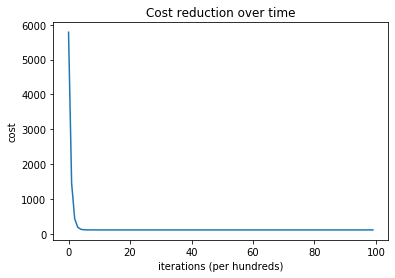

In [12]:
#Get number of features
start_time = time.time()
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = gradientUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=100)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print("--- %s seconds ---" % (time.time() - start_time))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

Number of Features 1
Optimized weights [[1.5129614]]
Optimized intercept 0.11193224117090832
Training error 111.964828837195
Test error 130.9945442726897
--- 0.41934871673583984 seconds ---


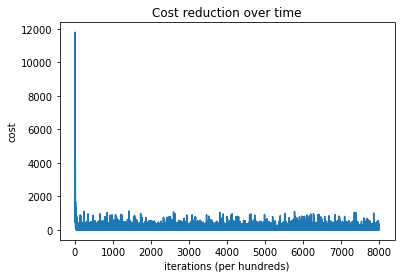

In [13]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)


#Gradient Descent
coeff, gradient, costs = stochasticUpdate(w, b, x_train, y_train, learning_rate=0.00001,no_iterations=100)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#
print("--- %s seconds ---" % (time.time() - start_time))
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

Number of Features 1
Optimized weights [[1.47880041]]
Optimized intercept 0.039359794129392396
Training error 110.18360544540911
Test error 122.4880831846906
--- 0.022971630096435547 seconds ---


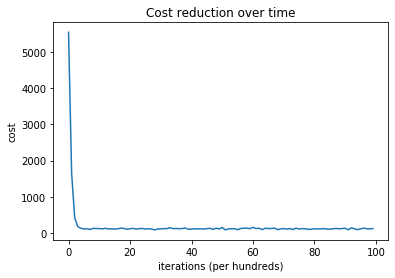

In [14]:
start_time = time.time()
#Get number of features
n_features = x_train.shape[1]
m_tr = x_train.shape[0]
m_ts = x_test.shape[0]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = miniBatchUpdate(w, b, x_train, y_train, learning_rate=0.0001,no_iterations=100)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#


final_tr_pred = predict(x_train, w,b)
final_tr_cost = (1/m_tr)*np.sum((y_train.T - final_tr_pred) ** 2)
print('Training error',final_tr_cost)
#
final_ts_pred = predict(x_test, w,b)
final_ts_cost = (1/m_ts)*np.sum((y_test.T - final_ts_pred) ** 2)
print('Test error',final_ts_cost)
#

print("--- %s seconds ---" % (time.time() - start_time))

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()